In [4]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = Z_{n}^(-e^(Z_{n}^p)^(e^(Z_{n}^p)^(-e^(Z_{n}^p)^(e^(Z_{n}^p)^(-e^(Z_{n}^p))))))
\end{eqnarray}""")

<IPython.core.display.Latex object>

# starfish figure: a numerical discovery.

    Sequential iteration of difference equation:
    Z = Z^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p)^(exp(Z^p)^(-exp(Z^p))))))
    
    with parameter set:
    p = = -0.040431211565+0.388620268274i
    on the complex plane produces a bug like figure.

In [5]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import SVG
from IPython.display import Image
from IPython.display import display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as ip

sys.path.insert(1, '../src');   import z_plane as zp
import graphic_utility as gu;   import itergataters as ig

In [28]:
def starfish_ish(Z, p, Z0=None, ET=None):
    """ Z = starfish_ish(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    return Z**(-np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p)**(np.exp(Z**p)**(-np.exp(Z**p))))))

In [37]:
#                                        -- machine with 4 cores --
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.0 + 0.0j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 16
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(starfish_ish, (-0.040431211565+0.388620268274j))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

30.066568851470947 	 total time


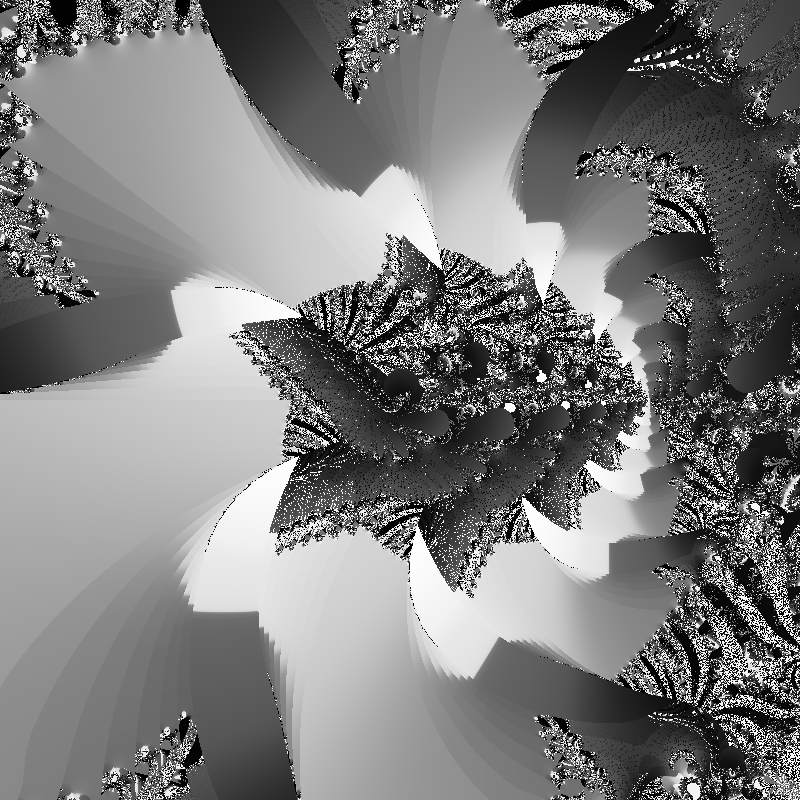

In [38]:
Mz = gu.mat2graphic(Z)
display(gu.mat_to_gray(Mz))

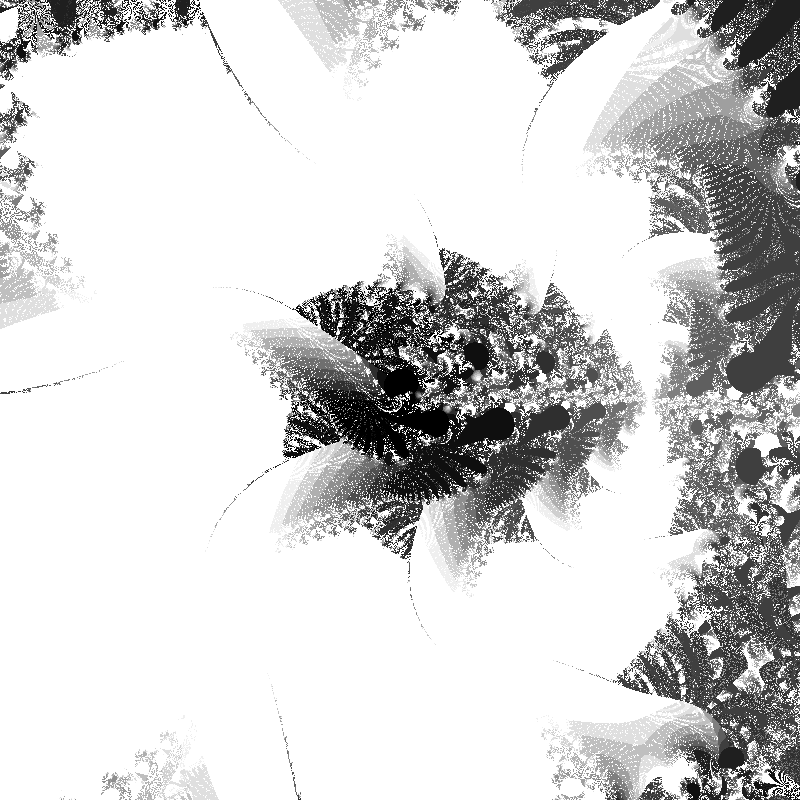

In [39]:
M_et = gu.mat2graphic(ET)
display(gu.mat_to_gray(M_et))

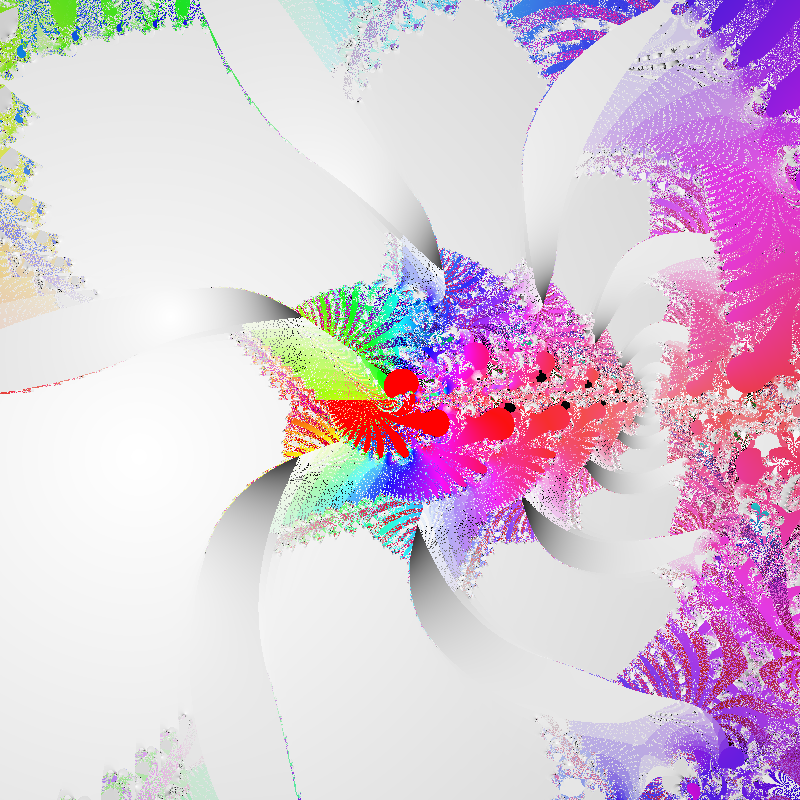

In [40]:
Ic = gu.Z_ET_to_show((Z-Z0), ET)
display(Ic)